In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [49]:
from matplotlib import rc,font_manager
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.rcParams['figure.figsize']=(10,9)
plt.rcParams['axes.unicode_minus']=False #축의 마이너스 기호를 유니코드로 바꾸지마라

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [9]:
boston=pd.DataFrame(data)
boston.columns=['CRIN','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
boston['MEDV']=target
boston

,CRIN,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
boston_chas_0=boston.loc[boston['CHAS']==0, 'MEDV']
boston_chas_1=boston.loc[boston['CHAS']==1, 'MEDV']
print(boston.shape)
print(boston_chas_0.shape)
print(boston_chas_1.shape)

(506, 14)
(471,)
(35,)


In [13]:
from scipy import stats
stats.ttest_ind(boston_chas_0, boston_chas_1)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

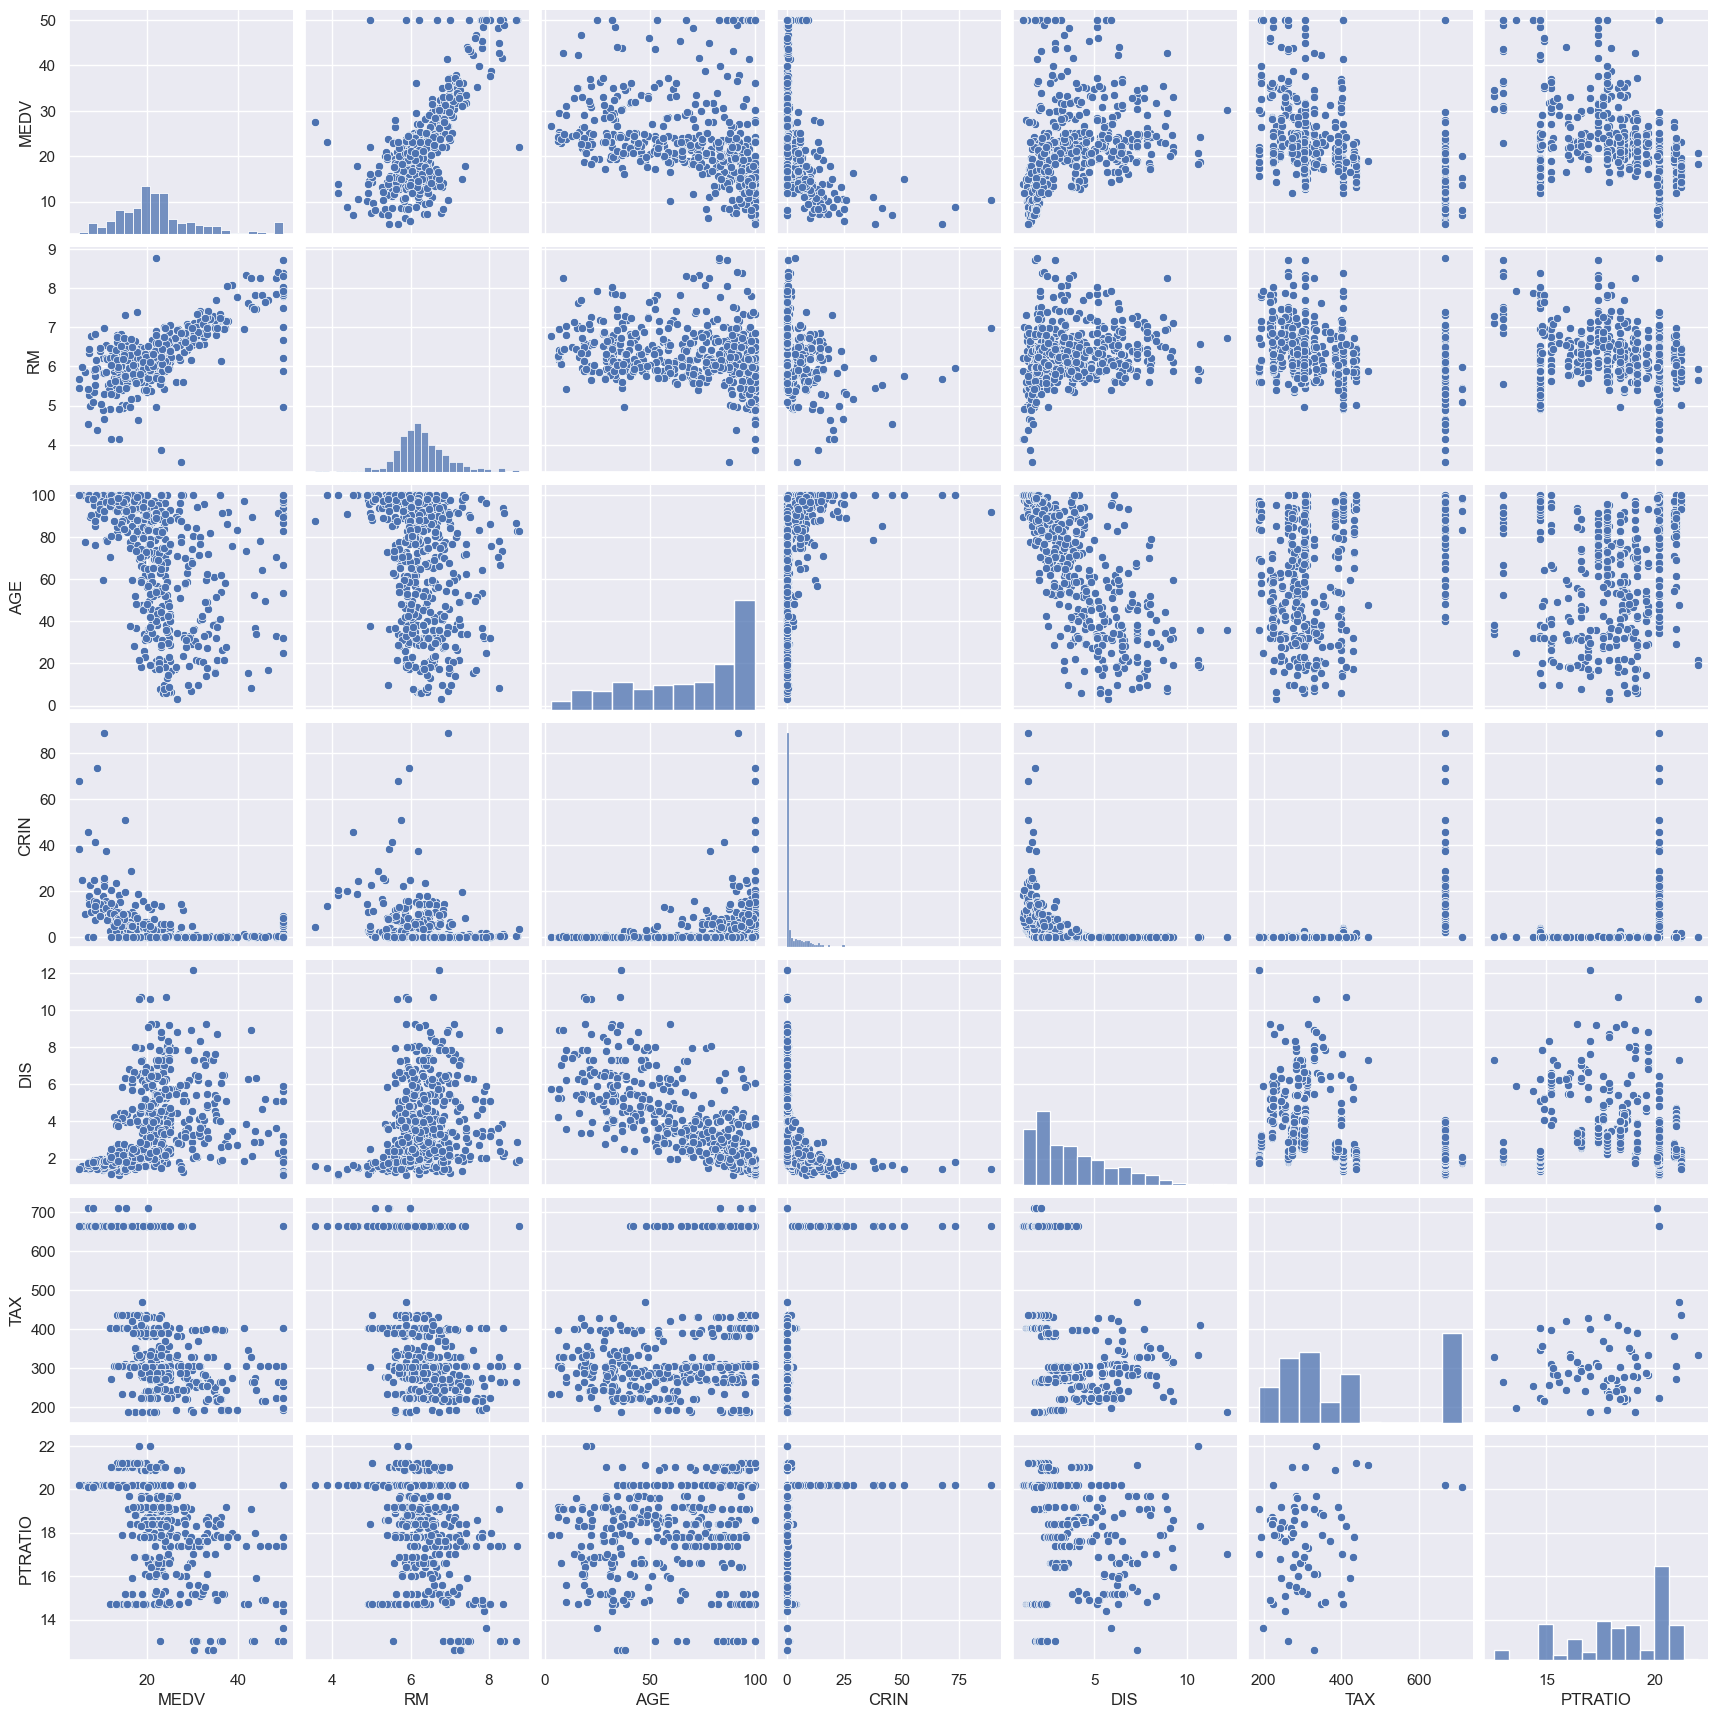

In [17]:
sns.pairplot(boston[['MEDV','RM','AGE','CRIN','DIS','TAX','PTRATIO']])

In [19]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [55]:
# formula = 'MEDV ~ CRIN + ZN + INDUS + \
#       NOX + RM + AGE + \
#       DIS + RAD + TAX + PTRATIO + \
#       LSTAT'

formula = 'MEDV ~ CRIN + ZN + INDUS + \
      CHAS + NOX + RM + AGE + \
      DIS + RAD + TAX + PTRATIO + \
      B + LSTAT'


In [56]:
regression_result=ols(formula,data=boston).fit()

In [57]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          6.72e-135
Time:                        15:32:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIN          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
boston.head()

,CRIN,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
sample=boston[boston.columns.difference(['CHAS','B','MEDV'])] #'quality','type' 빼기
sample1=sample[0:5][:]
sample1

,AGE,CRIN,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,65.2,0.00632,4.0900,2.31,4.98,0.538,15.3,1.0,6.575,296.0,18.0
1,78.9,0.02731,4.9671,7.07,9.14,0.469,17.8,2.0,6.421,242.0,0.0
2,61.1,0.02729,4.9671,7.07,4.03,0.469,17.8,2.0,7.185,242.0,0.0
3,45.8,0.03237,6.0622,2.18,2.94,0.458,18.7,3.0,6.998,222.0,0.0
4,54.2,0.06905,6.0622,2.18,5.33,0.458,18.7,3.0,7.147,222.0,0.0


In [42]:
sample_predict=regression_result.predict(sample1)
print(sample_predict)

0    30.256206
1    25.314495
2    30.908792
3    28.847775
4    28.097296
dtype: float64


In [43]:
sample1

,AGE,CRIN,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,65.2,0.00632,4.0900,2.31,4.98,0.538,15.3,1.0,6.575,296.0,18.0
1,78.9,0.02731,4.9671,7.07,9.14,0.469,17.8,2.0,6.421,242.0,0.0
2,61.1,0.02729,4.9671,7.07,4.03,0.469,17.8,2.0,7.185,242.0,0.0
3,45.8,0.03237,6.0622,2.18,2.94,0.458,18.7,3.0,6.998,222.0,0.0
4,54.2,0.06905,6.0622,2.18,5.33,0.458,18.7,3.0,7.147,222.0,0.0


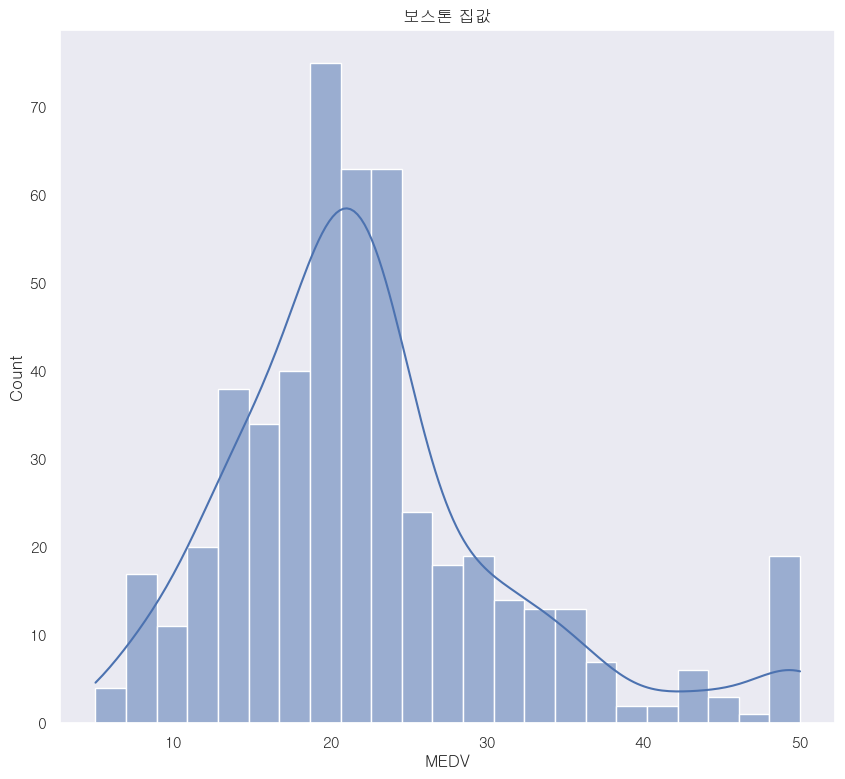

In [50]:
# sns.set_style('dark')
sns.histplot(data=boston['MEDV'], kde=True)
plt.title('보스톤 집값')
plt.show()

1. bostone 평균집 값[MEDV]에 RM(주택당 방 수)이 미치는 영향을 회귀부분 차트로 작성하라.
2. bostone 집값 회귀분석 값을 사용하여 각 필드가 집값에 미치는 영향을 회귀분석 부분 그리드 그래프를 작성하라

In [51]:
boston

,CRIN,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


eval_env: 1


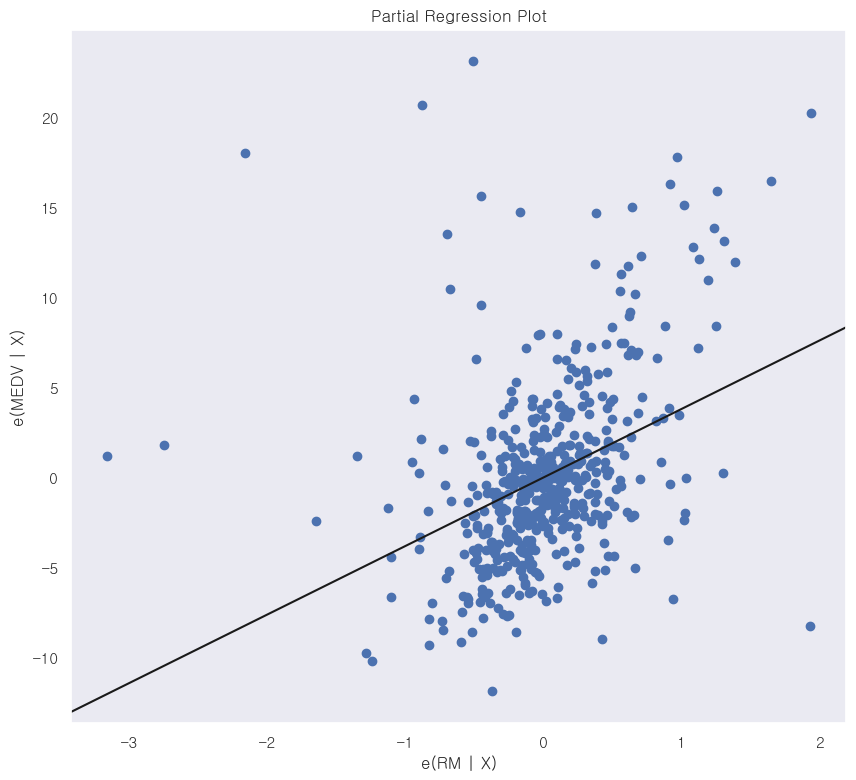

In [53]:
import statsmodels.api as sm

others=list(set(boston.columns).difference(set(['MEDV','RM'])))
p, resids=sm.graphics.plot_partregress('MEDV','RM', others, data=boston, obs_labels=False, ret_coords=True)
plt.show()

eval_env: 1


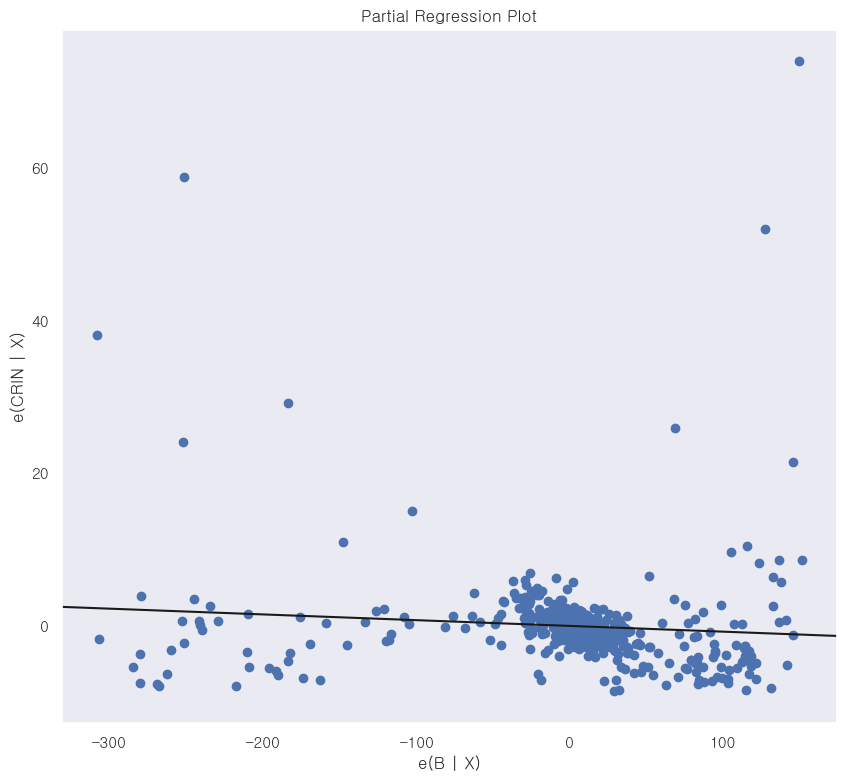

In [59]:
others1=list(set(boston.columns).difference(set(['CRIN','B'])))
p, resids=sm.graphics.plot_partregress('CRIN','B', others1, data=boston, obs_labels=False, ret_coords=True)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


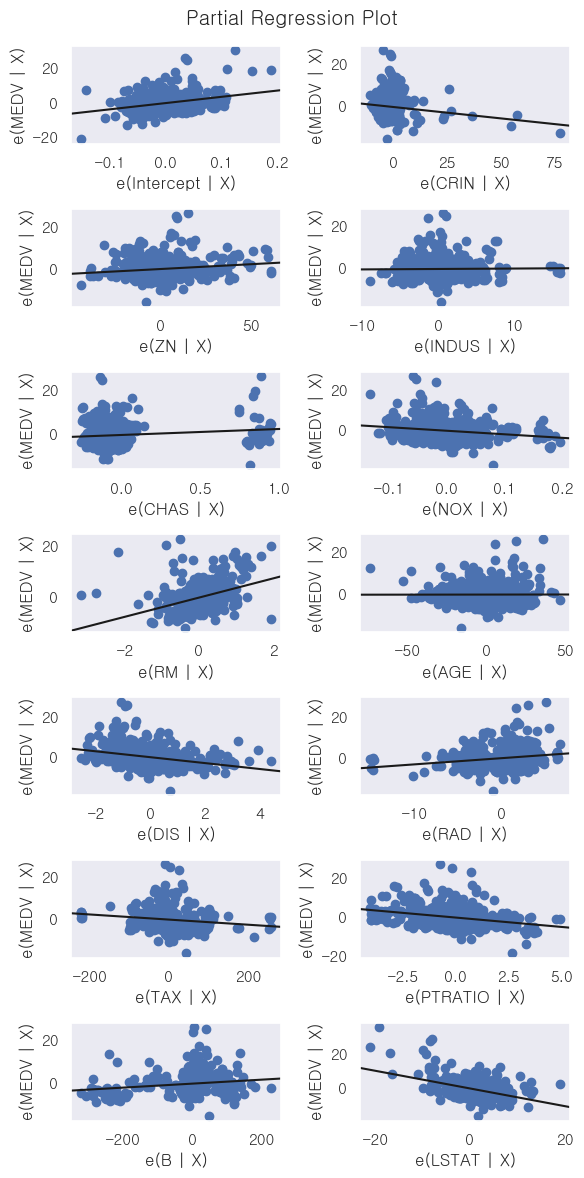

In [58]:
fig=plt.figure(figsize=(6,12))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()